## 均匀分布
$$u(x;\alpha,\beta) = \left\{\begin{array}{cl}\frac{1}{\beta-\alpha}&\textrm{for }\alpha<x<\beta\\0&\mathrm{elsewhere}\end{array}\right.$$

### 示意图

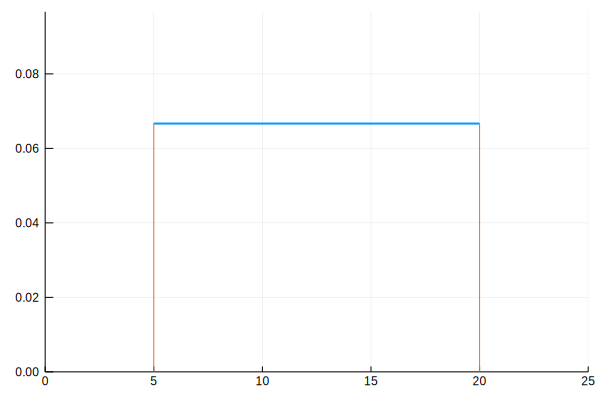

In [52]:
using Plots, Distributions, StatsBase
α, β = 5, 20
h = 1/(β - α)
f1 = plot([β, α], [h, h], leg=false, ylim=(0, h+.03), lw=2, xlim=(0, β+5))
plot!(f1, [α, α], [0, h])
plot!(f1, [β, β], [0, h], color=2)

### 随机数发生

在以下两个图中，图一把发生的 1000 个 5 至 20 之间均匀分布的随机数沿坐标横轴画了出来，可见是杂乱无章的。但是如果将它们排序，并将 5-20 之间分成 15 段，可以发现每段之中出现的随机数都约为 100 个。

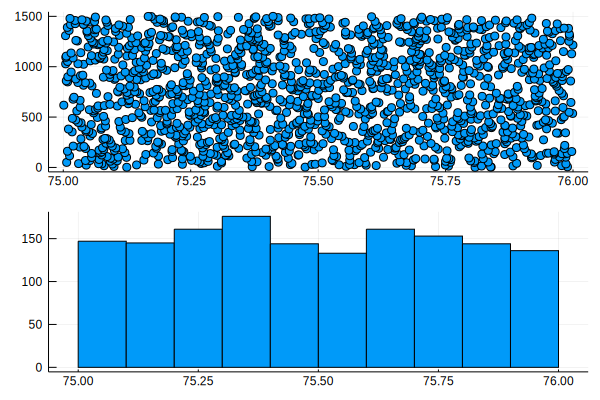

In [18]:
α, β =  5, 20
n = 1500
rst = rand(n) .+ α .* (β-α)
f2 = scatter(rst, 1:n, leg=false)

f3 = histogram(rst, leg=false)
plot(f2, f3, bins=15, layout=(2, 1))

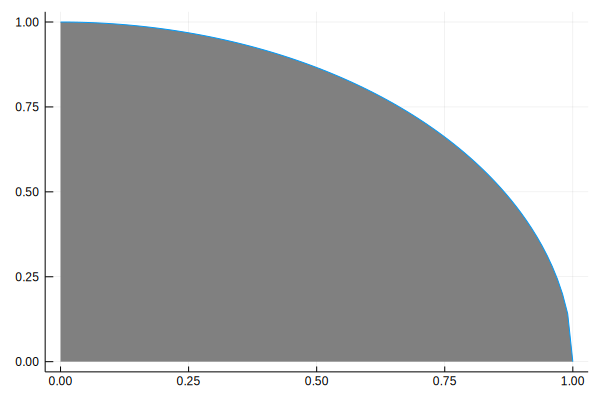

In [30]:
x = 0:.01:1
y = sqrt.(1 .- x.^2)
plot(x, y, fill=(0, :gray), leg=false)

如上图所示，如果把连续发生的 $n$ 对随机数 $(x_i, x_{i+1})$ 作为平面点的坐标，那么这些点将有 $\frac{\pi}{4}$ 的概率落在上图中灰色的圆内，这样我们就可以估计圆周率 $\pi$ 了:

In [40]:
n = 10^6
x = rand(n)
y = rand(n)
z = x.^2 + y.^2
println(count(x -> x<1., z) * 4 / n)

3.14208


以上这段小程序模拟了 1M 个点，可以看出结果与 $\pi$ 很接近。

以上模拟实际上也是在估计定积分 $\int_0^1{y} = \int_0^1{\sqrt{1-x^2}}$。通过这种方法，我们可以估计很多函数的定积分了。

## 正态分布
$$n(x;\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}\quad\textrm{for  } -\infty<x<\infty$$

### 示意图

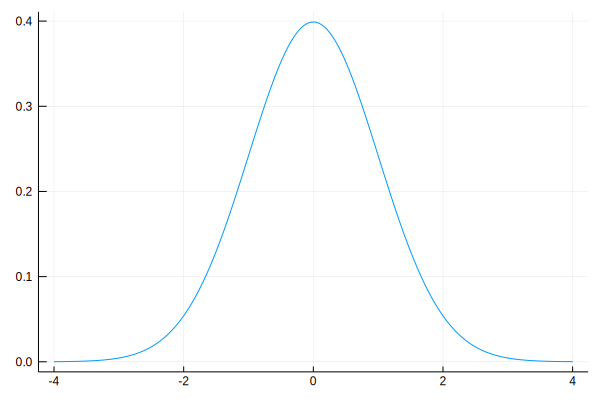

In [48]:
μ, σ = 0, 1
fig1 = plot([x -> pdf(Normal(μ,σ), x)], -4:.01:4, leg=false)

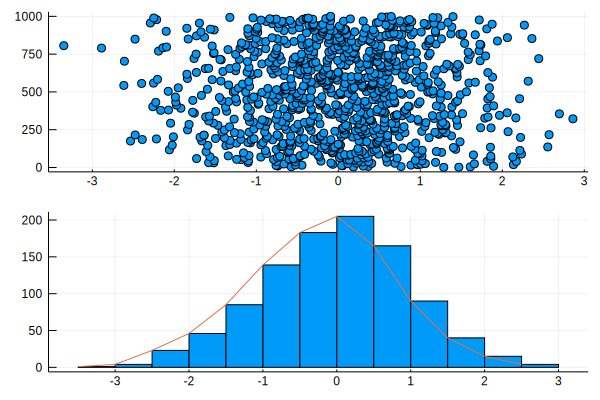

In [55]:
n = 1000
rst = rand(Normal(μ, σ), n)
fig2 = scatter(rst, 1:n, leg=false)
fig3 = histogram(rst, bins=20, leg=false)
tfit = fit(Histogram, rst, nbins=20)
plot!(fig3, tfit.edges[1][1:end-1], tfit.weights)
plot(fig2,fig3, layout=(2,1))
#savefig("somefile.png")  # and remember set dpi=300

## 练习
- 试通过模拟计算 $y=\sin(x)$ 的在区间 $x\in[0.5, 0.9]$ 中的定积分。
- 拭作图，并存为各种需要的格式